## Python and database connection

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [17]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [165]:
query = '''Select f.film_id, fc.category_id, f.rental_rate, f.rating, f.release_year, f.length, 
i.store_id, convert(r.rental_date, date) as activity_date,
date_format(convert(r.rental_date,date), '%M') as activity_month,
date_format(convert(r.rental_date,date), '%m') as activity_month_number,
date_format(convert(r.rental_date,date), '%Y') as activity_year
from rental r
join inventory i on r.inventory_id = i.inventory_id
join film f on i.film_id = f.film_id
join film_category fc on f.film_id = fc.film_id
order by f.film_id, activity_month_number;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,category_id,rental_rate,rating,release_year,length,store_id,activity_date,activity_month,activity_month_number,activity_year
0,1,6,0.99,PG,2006,86,1,2021-01-20,January,01,2021
1,1,6,0.99,PG,2006,86,1,2005-05-30,May,05,2005
2,1,6,0.99,PG,2006,86,2,2005-05-27,May,05,2005
3,1,6,0.99,PG,2006,86,1,2005-06-17,June,06,2005
4,1,6,0.99,PG,2006,86,2,2005-06-21,June,06,2005


In [166]:
data.shape

(15641, 11)

In [167]:
data.dtypes

film_id                    int64
category_id                int64
rental_rate              float64
rating                    object
release_year               int64
length                     int64
store_id                   int64
activity_date             object
activity_month            object
activity_month_number     object
activity_year             object
dtype: object

In [168]:
data = data.drop(['activity_month'], axis = 1)

In [169]:
data.head()

,film_id,category_id,rental_rate,rating,release_year,length,store_id,activity_date,activity_month_number,activity_year
0,1,6,0.99,PG,2006,86,1,2021-01-20,01,2021
1,1,6,0.99,PG,2006,86,1,2005-05-30,05,2005
2,1,6,0.99,PG,2006,86,2,2005-05-27,05,2005
3,1,6,0.99,PG,2006,86,1,2005-06-17,06,2005
4,1,6,0.99,PG,2006,86,2,2005-06-21,06,2005


In [170]:
data['activity_month_number'] = data['activity_month_number'].astype('int64')
data['activity_year'] = data['activity_year'].astype('int64')
data['store_id'] = data['store_id'].astype('object')
data['category_id'] = data['category_id'].astype('object')

In [171]:
data.dtypes

film_id                    int64
category_id               object
rental_rate              float64
rating                    object
release_year               int64
length                     int64
store_id                  object
activity_date             object
activity_month_number      int64
activity_year              int64
dtype: object

In [172]:
data = data.drop(['release_year'], axis = 1)
data = data.drop(['activity_date'], axis = 1)

In [173]:
data['rating'].value_counts()

PG-13    3487
NC-17    3218
PG       3121
R        3110
G        2705
Name: rating, dtype: int64

In [174]:
data.isna().sum()

film_id                  0
category_id              0
rental_rate              0
rating                   0
length                   0
store_id                 0
activity_month_number    0
activity_year            0
dtype: int64

In [175]:
data.describe()

,film_id,rental_rate,length,activity_month_number,activity_year
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,500.580462,2.944479,114.994246,7.011125,2005.012403
std,288.388638,1.649141,40.073243,1.036053,0.166119
min,1.000000,0.990000,46.000000,1.000000,2005.000000
25%,254.000000,0.990000,81.000000,7.000000,2005.000000
50%,496.000000,2.990000,114.000000,7.000000,2005.000000
75%,751.000000,4.990000,148.000000,8.000000,2005.000000
max,1000.000000,4.990000,185.000000,8.000000,2021.000000


In [176]:
#data['rental_rate'] = data['rental_rate'].astype('object')

In [177]:
data.dtypes

film_id                    int64
category_id               object
rental_rate              float64
rating                    object
length                     int64
store_id                  object
activity_month_number      int64
activity_year              int64
dtype: object

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

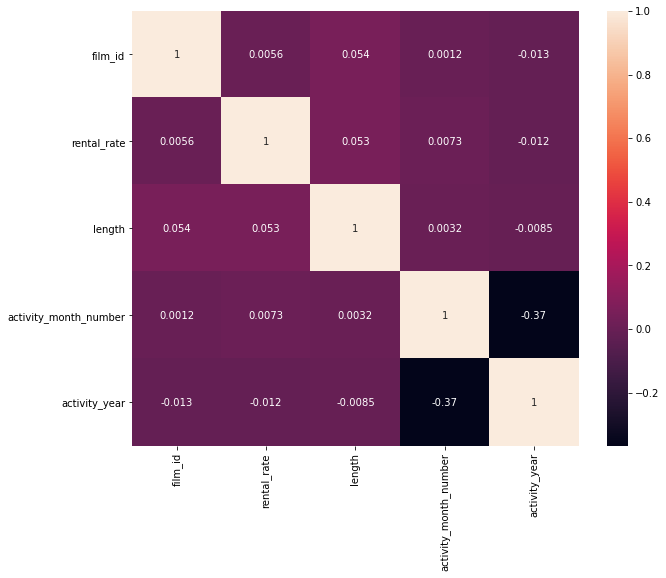

In [179]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [180]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [181]:
data_num1 = data[['length', 'rental_rate', 'activity_month_number']]
data_num2 = data[['film_id']]
data_cat = data.select_dtypes(include = np.object)

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


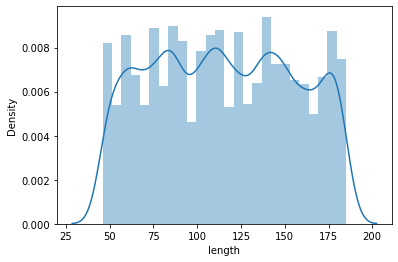

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


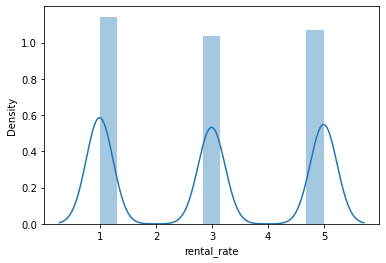

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


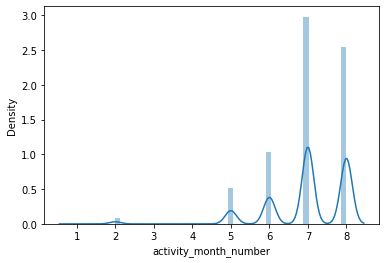

In [182]:
for x in data_num1.columns:
    sns.distplot(data_num1[x])
    plt.show()

In [183]:
transformer = StandardScaler().fit(data_num1)
x_normalized = transformer.transform(data_num1)
print(x_normalized.shape)
data_norm = pd.DataFrame(x_normalized)
data_norm.head()

(15641, 3)


,0,1,2
0,-0.723554,-1.185187,-5.802133
1,-0.723554,-1.185187,-1.941203
2,-0.723554,-1.185187,-1.941203
3,-0.723554,-1.185187,-0.975970
4,-0.723554,-1.185187,-0.975970


C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


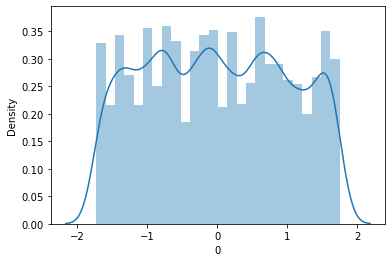

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


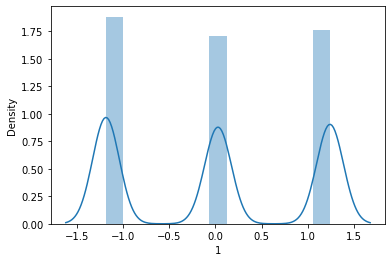

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


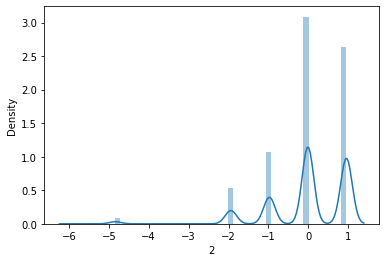

In [184]:
for x in data_norm.columns: 
    sns.distplot(data_norm[x])
    plt.show()

In [185]:
transformer = Normalizer().fit(data_num1)
x_normalizer = transformer.transform(data_num1)
print(x_normalizer.shape)
data_normalizer = pd.DataFrame(x_normalizer)
data_normalizer.head()

(15641, 3)


,0,1,2
0,0.999866,0.011510,0.011626
1,0.998248,0.011491,0.058038
2,0.998248,0.011491,0.058038
3,0.997509,0.011483,0.069594
4,0.997509,0.011483,0.069594


C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


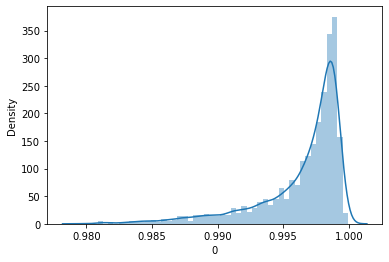

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


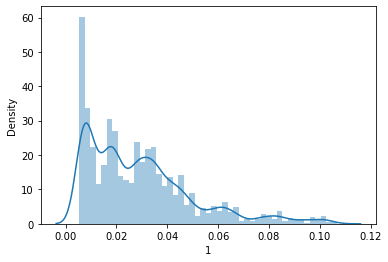

C:\Users\ROB3942\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


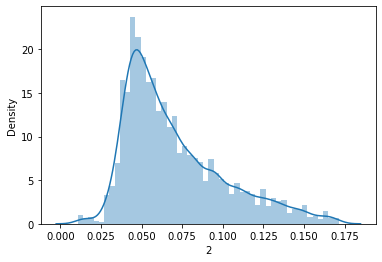

In [186]:
for x in data_normalizer.columns: 
    sns.distplot(data_normalizer[x])
    plt.show()

In [187]:
categorical = pd.get_dummies(data_cat)

In [188]:
categorical.head()

,category_id_1,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,...,category_id_14,category_id_15,category_id_16,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,store_id_1,store_id_2
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [195]:
#data_final = np.concatenate((data_normalizer, categorical, data_num2), axis=1)
data_final = np.concatenate((data_normalizer, data_num2), axis=1)

In [196]:
data_final_df = pd.DataFrame(data_final)
data_final_df.head()

,0,1,2,3
0,0.999866,0.011510,0.011626,1.0
1,0.998248,0.011491,0.058038,1.0
2,0.998248,0.011491,0.058038,1.0
3,0.997509,0.011483,0.069594,1.0
4,0.997509,0.011483,0.069594,1.0


In [197]:
data_final_df.value_counts()

0         1         2         3    
0.998898  0.027238  0.038209  767.0    15
0.991221  0.018515  0.130916  697.0    15
0.996667  0.032043  0.075018  378.0    15
0.995568  0.054592  0.076582  893.0    14
0.991099  0.077275  0.108401  911.0    14
                                       ..
0.999190  0.006551  0.039703  834.0     1
0.999195  0.017890  0.035899  293.0     1
0.997508  0.065494  0.026250  405.0     1
0.998674  0.026425  0.044189  842.0     1
0.999926  0.005380  0.010869  886.0     1
Length: 3649, dtype: int64

In [198]:
data_final_df.dtypes

0    float64
1    float64
2    float64
3    float64
dtype: object

In [200]:
data_final_df[3] = data_final_df[3].astype('int64')

In [201]:
query = '''select distinct f.film_id, r.rental_id, 
concat(date_format(convert(r.rental_date,date), '%m'), '' , date_format(convert(r.rental_date,date), '%Y')) as last_month,
CASE
WHEN concat(date_format(convert(r.rental_date,date), '%m'), '' , date_format(convert(r.rental_date,date), '%Y')) = '022006' THEN '1'
ELSE '0'
END AS 'rented_last_month'
from rental r
join inventory i on r.inventory_id = i.inventory_id
join film f on i.film_id = f.film_id
order by rented_last_month DESC'''

data_predict = pd.read_sql_query(query, engine)
data_predict.head()

,film_id,rental_id,last_month,rented_last_month
0,886,13025,022006,1
1,893,11577,022006,1
2,892,11782,022006,1
3,936,14531,022006,1
4,914,14488,022006,1


In [202]:
data_final_df.columns

RangeIndex(start=0, stop=4, step=1)

In [203]:
list(data_final_df[3])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 

In [207]:
data_final_df.rename(columns={3:'film_id'}, inplace=True)
data_final_df.head()

,0,1,2,film_id
0,0.999866,0.011510,0.011626,1
1,0.998248,0.011491,0.058038,1
2,0.998248,0.011491,0.058038,1
3,0.997509,0.011483,0.069594,1
4,0.997509,0.011483,0.069594,1


In [208]:
data_merged = data_final_df.merge(data_predict, how='inner', on='film_id')

#data_final = number_rentals_may.merge(number_rentals_june, left_on='customer_id', right_on='customer_id')
data_merged.head()

,0,1,2,film_id,rental_id,last_month,rented_last_month
0,0.999866,0.01151,0.011626,1,4863,072005,0
1,0.999866,0.01151,0.011626,1,11433,082005,0
2,0.999866,0.01151,0.011626,1,14714,082005,0
3,0.999866,0.01151,0.011626,1,16050,012021,0
4,0.999866,0.01151,0.011626,1,972,052005,0


In [209]:
data_merged = data_merged.drop(['rental_id','last_month'], axis = 1)

In [210]:
data_merged.head()

,0,1,2,film_id,rented_last_month
0,0.999866,0.01151,0.011626,1,0
1,0.999866,0.01151,0.011626,1,0
2,0.999866,0.01151,0.011626,1,0
3,0.999866,0.01151,0.011626,1,0
4,0.999866,0.01151,0.011626,1,0


In [213]:
data_merged = data_merged.drop(['film_id'], axis = 1)

In [214]:
data_merged.head()

,0,1,2,rented_last_month
0,0.999866,0.01151,0.011626,0
1,0.999866,0.01151,0.011626,0
2,0.999866,0.01151,0.011626,0
3,0.999866,0.01151,0.011626,0
4,0.999866,0.01151,0.011626,0


In [215]:
Y = data_merged['rented_last_month']
X = data_merged.drop(['rented_last_month'], axis=1)

In [217]:
from sklearn.model_selection import train_test_split
x_train_num, x_test_num, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [219]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train_num, y_train)

In [220]:
print("The accuracy of the model in the TEST set is: ", round(classification.score(x_test_num, y_test),2))

The accuracy of the model in the TEST set is:  0.99


In [221]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, classification.predict(x_test_num))

array([[96675,     0],
       [ 1053,     0]], dtype=int64)

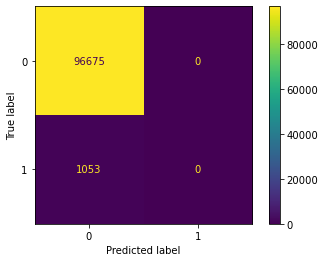

In [222]:
plot_confusion_matrix(classification, x_test_num, y_test)

In [225]:
from sklearn.metrics import cohen_kappa_score
predictions = classification.predict(x_test_num)
classification.score(x_test_num, y_test)
print (cohen_kappa_score(y_test, predictions))

0.0
